<h1 style="text-align: center;">Assignment - 1</h1>
<div style="display: flex; justify-content: space-between;">
  <div style="text-align: left;">
    <strong>Roll No:</strong> 241110035<br>
    <strong>Name:</strong> Khushwant Kaswan
  </div>
  <div style="text-align: center;">
    <strong>CS724: SENSING COMMUNICATIONS AND </strong> <br>
    <strong>NETWORKING FOR SMART WIRELESS DEVICES</strong>
  </div>
  <div style="text-align: right;">
    <strong>IIT Kanpur</strong><br>
    <strong>MTech CSE</strong>
  </div>
</div>
<hr />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

Question 1
Solution is done in Report

Code for plotting Vectors

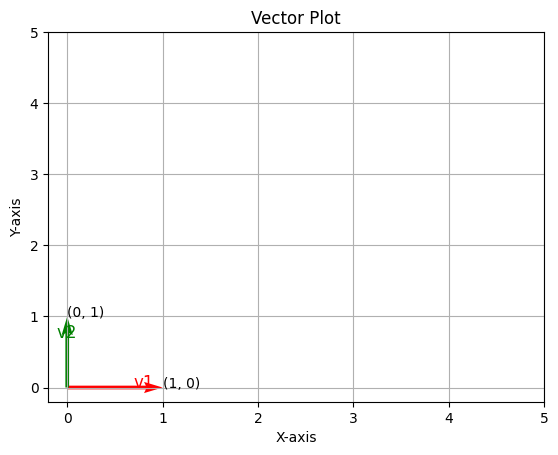

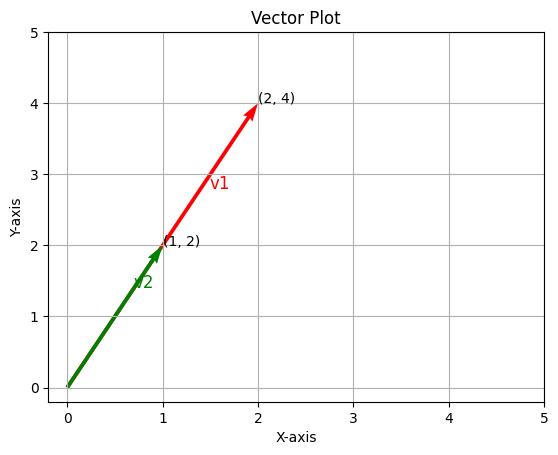

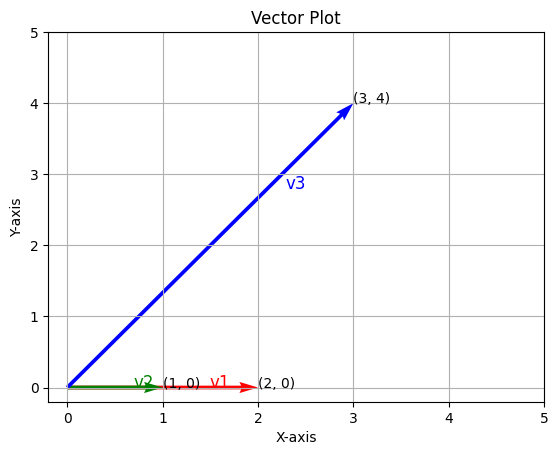

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_points(points):
    points = np.array(points)
    X, Y = points[:, 0], points[:, 1]
    origin = np.array([[0, 0]] * len(X))
    colors = ['r', 'g', 'b', 'm'][:len(points)]

    plt.quiver(origin[:, 0], origin[:, 1], X, Y, angles='xy', scale_units='xy', scale=1, color=colors)

    for i in range(len(points)):
        plt.text(X[i], Y[i], f'({X[i]}, {Y[i]})', fontsize=10, ha='left')
        plt.text(X[i] * 0.8, Y[i] * 0.7, f'v{i+1}', fontsize=12, ha='center', color=colors[i])

    plt.xlim(-0.2, 5)
    plt.ylim(-0.2, 5)
    plt.grid(True)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Vector Plot')
    plt.show()

plot_points([[1,0],[0,1]])
plot_points([[2,4],[1,2]])
plot_points([[2,0],[1,0],[3,4]])


Question 2

Fix the user at (100,100,100). Put 5 satellites at any random locations and fix their positions.

In [3]:
user=(100,100,100)
user = np.array(user)
x = [random.randrange(0, 10000) for _ in range(5)]
y = [random.randrange(0, 10000) for _ in range(5)]
z = [random.randrange(0, 10000) for _ in range(5)]
x = np.array(x)
y = np.array(y)
z = np.array(z)

print("User's Location :",user)
count=1
for xi, yi, zi in zip(x, y, z):
    print("Location of satellite ",count," : [",xi,",", yi,",",zi,"]")
    count+=1

User's Location : [100 100 100]
Location of satellite  1  : [ 9213 , 4628 , 5690 ]
Location of satellite  2  : [ 3240 , 7648 , 3994 ]
Location of satellite  3  : [ 189 , 2815 , 462 ]
Location of satellite  4  : [ 2534 , 9264 , 8276 ]
Location of satellite  5  : [ 208 , 1856 , 9567 ]


In [4]:
def get_user_pos(time,x,y,z):
    # Parameters: Time array, x_positions array,y_positions array,z_positions array
    # Return : Matrices A,B,X from AX=B
    r = time * c
    b = (r[:-1]**2 - r[1:]**2) - (x[:-1]**2 - x[1:]**2) - (y[:-1]**2 - y[1:]**2) - (z[:-1]**2 - z[1:]**2)
    B=np.array([[b[0]],[b[1]],[b[2]],[b[3]]])

    A= np.array([
    [ x[1]-x[0] , y[1]-y[0] , z[1]-z[0]  ],
    [ x[2]-x[1] , y[2]-y[1] , z[2]-z[1]  ],
    [ x[3]-x[2] , y[3]-y[2] , z[3]-z[2]  ],
    [ x[4]-x[3] , y[4]-y[3] , z[4]-z[3]  ]
    ] )*2

    # Short method for calculating A
    # A = 2 * np.diff(np.column_stack((x, y, z)), axis=0)

    X = np.matmul(np.linalg.inv(np.matmul(A.transpose() , A)) , np.matmul(A.transpose() , B))
    return [A,B,X]

Part 1 

Calculate the time it takes for a signal to arrive from each one of these satellites to the user.

In [5]:
c=300000000 # in m/s units
distances = np.sqrt((user[0] - x)**2 + (user[1] - y)**2 + (user[2] - z)**2)
time = distances / c

count=1
for i in time:
    print(f"Time taken by a signal to arrive from satellite {count} to the user is {i} seconds. ie. about {i:.8f} seconds")
    count+=1


Time taken by a signal to arrive from satellite 1 to the user is 3.870079714941283e-05 seconds. ie. about 0.00003870 seconds
Time taken by a signal to arrive from satellite 2 to the user is 3.018372261850932e-05 seconds. ie. about 0.00003018 seconds
Time taken by a signal to arrive from satellite 3 to the user is 9.134908623273446e-06 seconds. ie. about 0.00000913 seconds
Time taken by a signal to arrive from satellite 4 to the user is 4.173331043662844e-05 seconds. ie. about 0.00004173 seconds
Time taken by a signal to arrive from satellite 5 to the user is 3.20969519148193e-05 seconds. ie. about 0.00003210 seconds


Part 2

Use the satellite locations and the times to find out the location of the user. 

In [6]:
X=get_user_pos(time,x,y,z)
print('Matrix A :\n',X[0])
print('Matrix B :\n',X[1])
print("Calculated user position= (",X[2][0][0],",",X[2][1][0],",",X[2][2][0],")")
print('Localization error:',np.sqrt((X[2][0][0]-100)**2+(X[2][1][0]-100)**2+(X[2][2][0]-100)**2))


Matrix A :
 [[-11946   6040  -3392]
 [ -6102  -9666  -7064]
 [  4690  12898  15628]
 [ -4652 -14816   2582]]
Matrix B :
 [[ -929800.00000001]
 [-2283199.99999999]
 [ 3321599.99999997]
 [-1688599.99999997]]
Calculated user position= ( 100.00000000000028 , 99.99999999999788 , 99.99999999999987 )
Localization error: 2.1402320952104902e-12


Part 3

Add some random errors with the times. Check how much location inaccuracy it showing up.

In [7]:
rand_error=np.random.rand()/10**8
t_new = [t + rand_error for t in time]
t_new=np.array(t_new)
print('Original Time : ',time)
print('New Time with added error : ',t_new)

X_new=get_user_pos(t_new,x,y,z)
print("Calculated user position= (",X_new[2][0][0],",",X_new[2][1][0],",",X_new[2][2][0],")")
print('Localization error:',np.sqrt((X_new[2][0][0]-100)**2+(X_new[2][1][0]-100)**2+(X_new[2][2][0]-100)**2))


Original Time :  [3.87007971e-05 3.01837226e-05 9.13490862e-06 4.17333104e-05
 3.20969519e-05]
New Time with added error :  [3.87079324e-05 3.01908579e-05 9.14204391e-06 4.17404457e-05
 3.21040872e-05]
Calculated user position= ( 99.11141685179818 , 99.12215367176967 , 98.28264119534283 )
Localization error: 2.1235619725332304


Part 4

Now increase the amount of the random errors with time, and check what is the effect of this change on the localization error. <br>
Plot a graph on the amount of timing errors vs localization error to see the effect. <br>
You need to run the program multiple time and then can take the average localization errors).

Average Localization error for 0.00000000 amount of timing error : 0.00000000
Average Localization error for 0.00000001 amount of timing error : 4.92928713
Average Localization error for 0.00000002 amount of timing error : 17.47348751
Average Localization error for 0.00000003 amount of timing error : 23.59125962
Average Localization error for 0.00000004 amount of timing error : 34.50754405
Average Localization error for 0.00000005 amount of timing error : 35.92264093
Average Localization error for 0.00000006 amount of timing error : 45.39268693
Average Localization error for 0.00000007 amount of timing error : 60.28823295
Average Localization error for 0.00000008 amount of timing error : 61.68829740
Average Localization error for 0.00000009 amount of timing error : 67.49303988
Average Localization error for 0.00000010 amount of timing error : 81.77741426
Average Localization error for 0.00000011 amount of timing error : 98.14658544
Average Localization error for 0.00000012 amount of ti

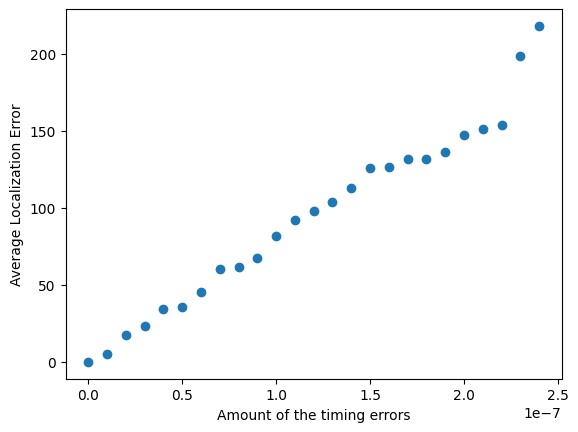

In [9]:
avg_localization_errors=[]

error_list=[]
for i in range(25):
  error_list.append(0.00000001*i)

tests=15
for e in error_list:
  # print("Amount of timing error  ",q ,":")
  curr_loc_error=0
  for i in range(tests):
    time_plus_error=[t+np.random.normal(scale=e) for t in time]
    time_plus_error=np.array(time_plus_error)

    X_i=get_user_pos(time_plus_error,x,y,z)
    Local_error=np.sqrt((X_i[2][0][0]-100)**2 + (X_i[2][1][0]-100)**2 + (X_i[2][2][0]-100)**2)
    curr_loc_error += Local_error

  curr_avg_err=curr_loc_error/tests
  print(f"Average Localization error for {e:.8f} amount of timing error : {curr_avg_err:.8f}")
  avg_localization_errors.append(curr_avg_err)

plt.scatter(error_list, avg_localization_errors)
plt.xlabel('Amount of the timing errors')
plt.ylabel('Average Localization Error')
plt.show()

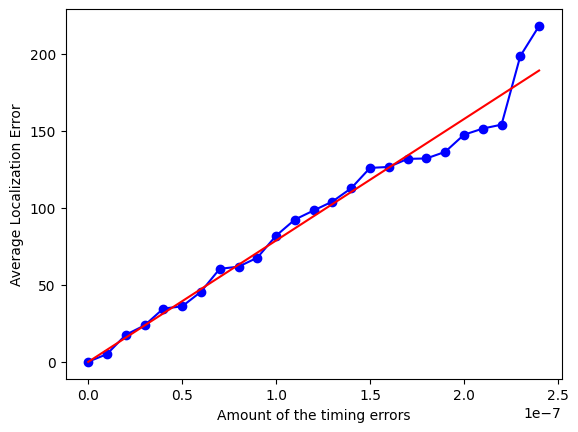

In [10]:
slope, intercept = np.polyfit(error_list, avg_localization_errors, 1)
fitted_line = slope * np.array(error_list) + intercept

avg_localization_errors.sort()
plt.scatter(error_list, avg_localization_errors, color='blue', label='Data points')
plt.plot(error_list, avg_localization_errors, color='blue')
plt.plot(error_list, fitted_line, color='red')

plt.xlabel('Amount of the timing errors')
plt.ylabel('Average Localization Error')
plt.show()